> ### EEE3314: Introduction to Artificial Intelligence

# Assignment \# VI:  KNN

### *Assignement Instructions:*
- **Due date**: 11 PM, Nov. 19, 2021
- **File name**: ID_Name_HW4.ipynb
- Write a program implementing a particular algorithm to solve a given problem.   
- **Analyze the algorithm, theoretically and empirically. Report and discuss your results.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.**
We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by your so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework.
- Signiture: <span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-11-08 06:51:47.099687


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Problem statement

In this project, we will use the $\texttt{Labeled Faces in the Wild (LFW)}$ dataset, designed for studying face verification and identification, fetched from ```sklearn.datasets.fetch_lfw_people```. It provides lots of images of faces collected from the web. To crop the images of faces, the dataset uses the Viola-Jones face detector. Let’s first visualize images in the $\texttt{LFW}$ dataset. For more details, please refer to the description below.

In [3]:
from project6 import *

In [4]:
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [5]:
print(faces['DESCR']) # description

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

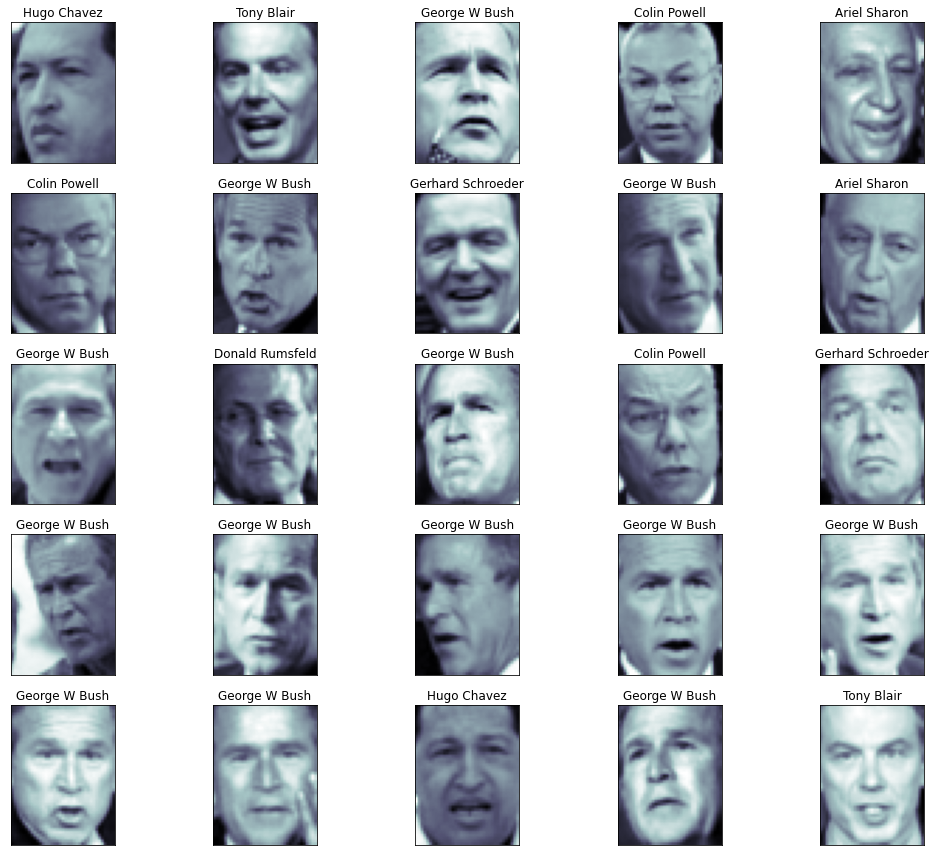

In [6]:
fig = plt.figure(figsize=(15, 12))
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)
    name = faces.target_names[faces.target[i]]
    ax.set_title(name)
plt.tight_layout()
plt.show()

Let’s apply a $\texttt{weighted k-NN classifier}$ to identify persons with the $\texttt{Labeled Faces in the Wild}$ dataset.

**NOTE**: To implement the $\texttt{k-NN classifier}$, exploiting ```sklearn.neighbors``` (or equivalent) **will not be allowed**. You will get no credit otherwise.

### P1. Weighted k-NN Classifier

P1.1 Implement a weighted knn classifier (the ```KNN_Classifier``` class) using a kernel function, where we use **Euclidean distances** between intensity values, to measure the similarity of two images. Detailed descriptions are in the following. *(60 points)*  
> **Distance metric**: Euclidean distances between intensities, $d(\mathbf{x}, \mathbf{y}) = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 + \cdots + \left( {y_n - y_n } \right)^2 }$, where we denote by $x_i$ and $y_i$, $i\in\{1,\dots,n\}$ intensity values of the images $\mathbf{x}$ and $\mathbf{y}$, respectively. $n$ is the total number of pixels in the image.
>
> **Kernel functions**
>> **Uniform kernel** : $\mathcal{K}(d) = 1 $  
>> **Inverse kernel** : $\mathcal{K}(d) = \bigg\{ \begin{array}{ll} \frac{1}{d} & (d \neq 0) \\ 1 & (d = 0) \end{array} $   
>> **Gaussian kernel** : $\mathcal{K}(d, \lambda) = e^{\frac{-d^2}{\lambda}} $
>
> **Prediction** : The most common value in K-nearest neighbors


In **P1.1**, we use inntensity values of an image as features for the knn classifier. However, in practice, the distances between intensity values are not discriminative enough to differenciate identities of persons. To address this problem, we will use the **eigenface** to extract features for face images.

The **eigenface** is a very popular method for face recognition in computer vision. The eigenface representation provides a set of eigenvercotors (i.e., basis functions) for face images. This suggests that we can represent an arbtrary face image as a linear combination of the eigenvercotors and corresponding coefficients. The engenface representations could also be used to compress face images by representing them using the eigenface representations, discarding eigenvectors with small coefficients, and reconstructing the face images with limited eigenvectors. 

We will implement the **eigenface** from scratch later!

P1.2 Run the code provided to determine which feature representations are more discriminative then the other (intensity values vs. eigenface). *(10 points)*

P1.3 Implement the ```stack_accuracy_over_k``` function that inputs a list of kernel weights, a maximum value of k, a training dataset, and a test dataset and outputs the prediction accuracies on training and test datasets. Plot accuracies on training and testing samples, over the value of $k$. The parameter starts and ends from the values of 1 to 50, respectively, with the increment of 1. *(10 points)*

### Prepare training samples

In [7]:
X = faces.data
y = faces.target
X_image = faces.images
name = faces.target_names

In [8]:
X_train, X_test, X_train_image, X_test_image, y_train, y_test = train_test_split(X, X_image, y, test_size=0.33, random_state=42)

In [9]:
print("X_train.shape: ", X_train.shape)
print("X_train[0].shape: ",X_train[0].shape)
print("y_train.shape: ", y_train.shape)

X_train.shape:  (862, 1850)
X_train[0].shape:  (1850,)
y_train.shape:  (862,)


### P1.1

In [10]:
my_clf_uniform = KNN_Classifier(n_neighbors=3, weights="uniform")
my_clf_inverse_distance = KNN_Classifier(n_neighbors=3, weights="inverse distance")
my_clf_gaussian = KNN_Classifier(n_neighbors=3, weights=GaussianKernel(1000000))

In [11]:
my_clf_uniform.fit(X_train, y_train)
my_clf_inverse_distance.fit(X_train, y_train)
my_clf_gaussian.fit(X_train, y_train)

In [12]:
y_pred  = my_clf_uniform.predict(X_train)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_uniform.predict(X_test)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 0.7517401392111369
test accuracy: 0.5610328638497653


In [13]:
y_pred  = my_clf_inverse_distance.predict(X_train)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_inverse_distance.predict(X_test)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 1.0
test accuracy: 0.5610328638497653


In [14]:
y_pred  = my_clf_gaussian.predict(X_train)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_gaussian.predict(X_test)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 1.0
test accuracy: 0.5633802816901409


### Generate new feature representations using Eigenfaces

In [15]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

In [16]:
faces.images[0].shape

(50, 37)

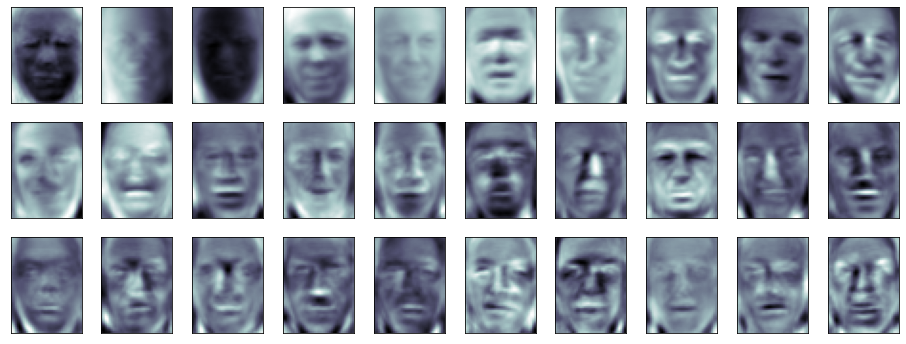

In [17]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [18]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(862, 150)
(426, 150)


### P1.2

In [19]:
my_clf_uniform.fit(X_train_pca, y_train)
my_clf_inverse_distance.fit(X_train_pca, y_train)
my_clf_gaussian.fit(X_train_pca, y_train)

In [20]:
y_pred  = my_clf_uniform.predict(X_train_pca)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_uniform.predict(X_test_pca)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 0.8491879350348028
test accuracy: 0.6572769953051644


In [21]:
y_pred  = my_clf_inverse_distance.predict(X_train_pca)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_inverse_distance.predict(X_test_pca)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 1.0
test accuracy: 0.6690140845070423


In [22]:
y_pred  = my_clf_gaussian.predict(X_train_pca)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_gaussian.predict(X_test_pca)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 0.9153132250580046
test accuracy: 0.6690140845070423


### P1.3

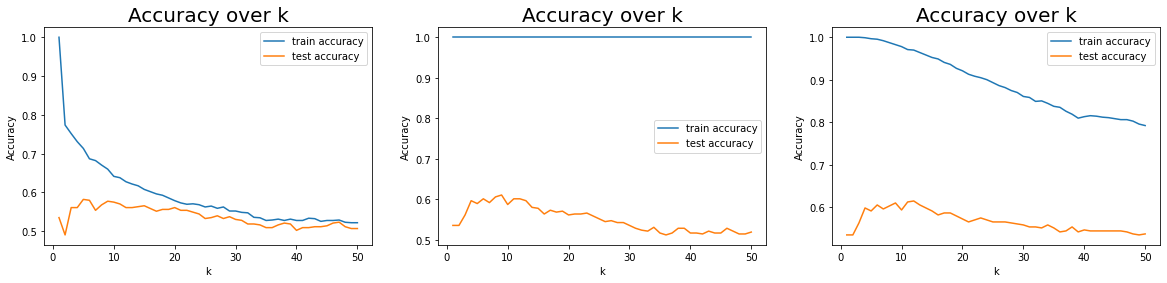

In [23]:
stack_accuracy_over_k(X_train, y_train, X_test, y_test)

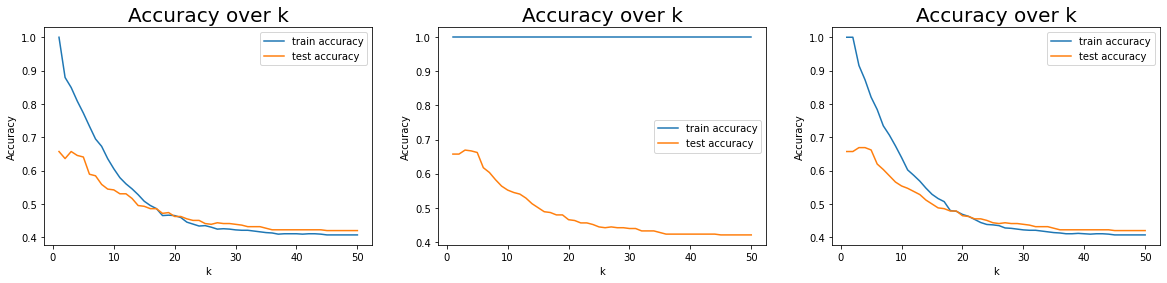

In [24]:
stack_accuracy_over_k(X_train_pca, y_train, X_test_pca, y_test)

### Qualitative comparison

Run the code provided to plot the query and corresponding k nearest neighbor images, obtained using different features (intensity values and eigenfaces). The queries are randomly chosen from the training and testing samples.

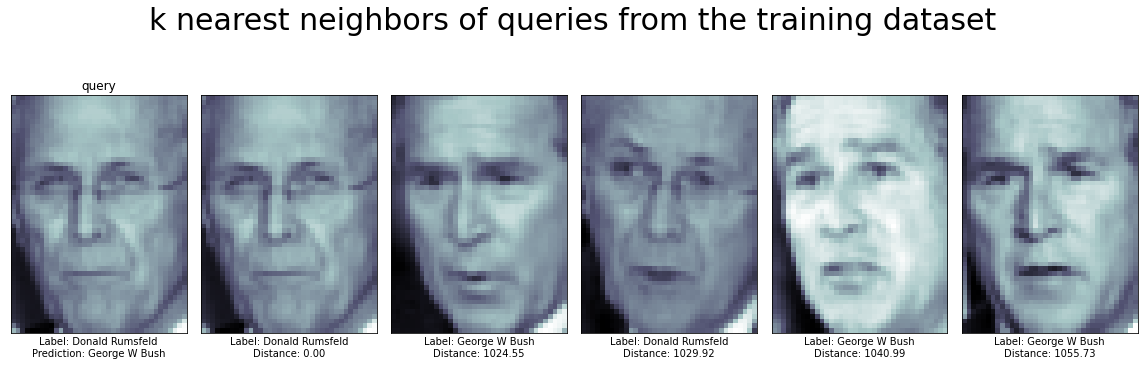

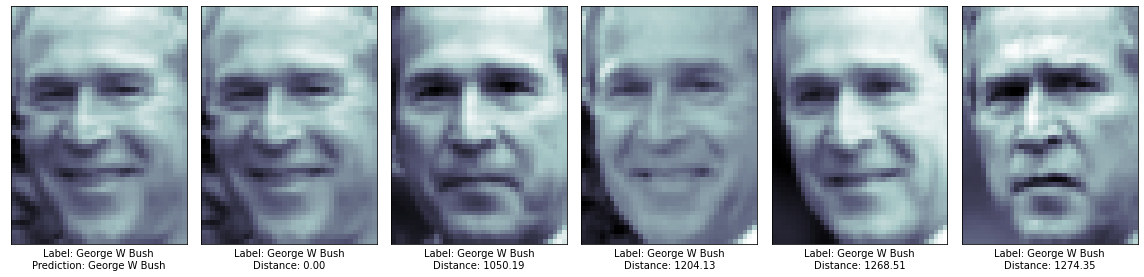

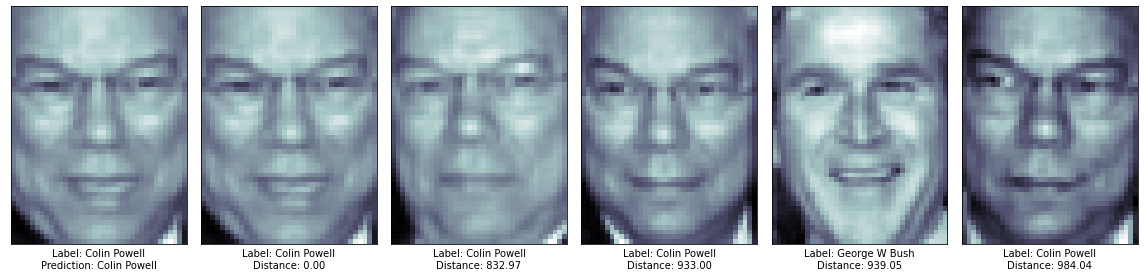

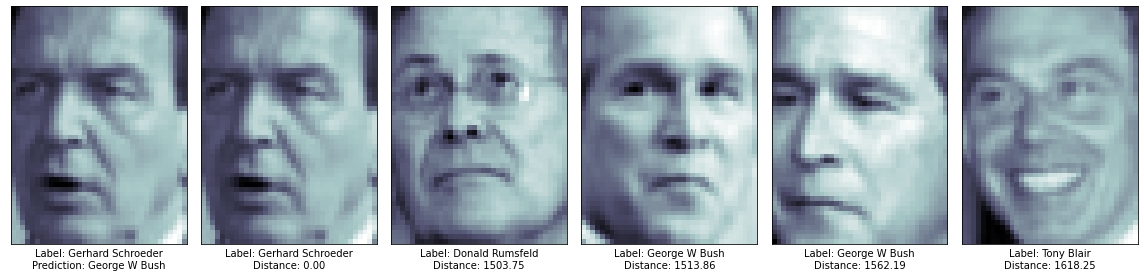

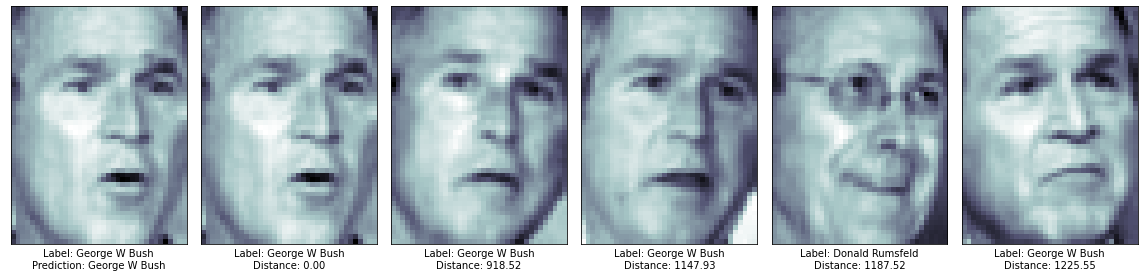

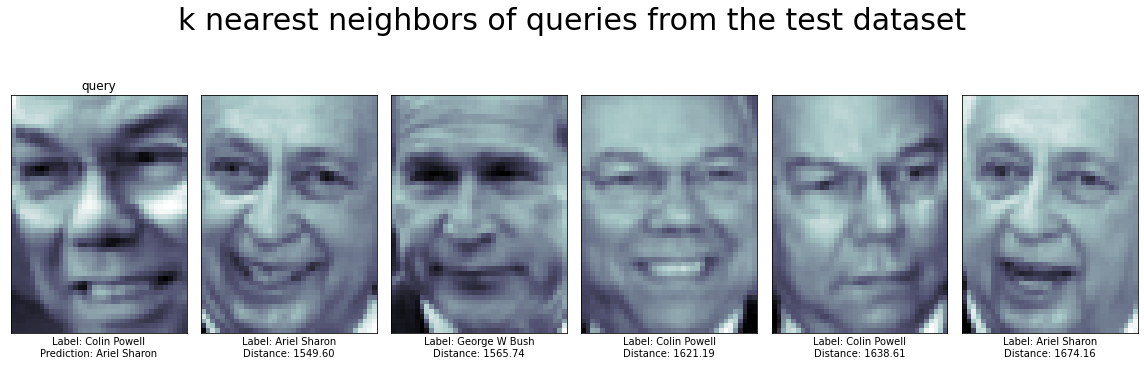

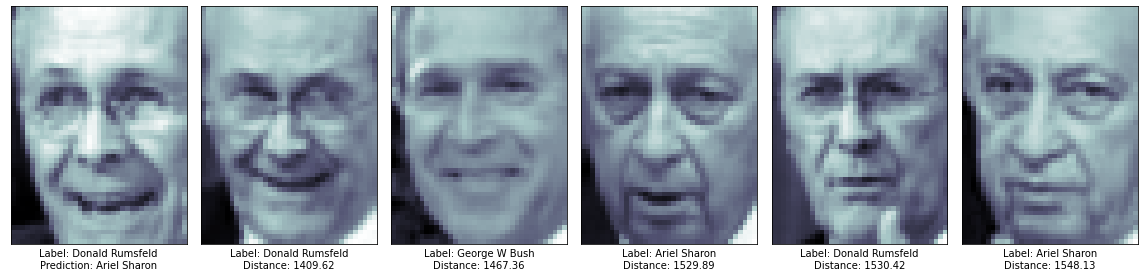

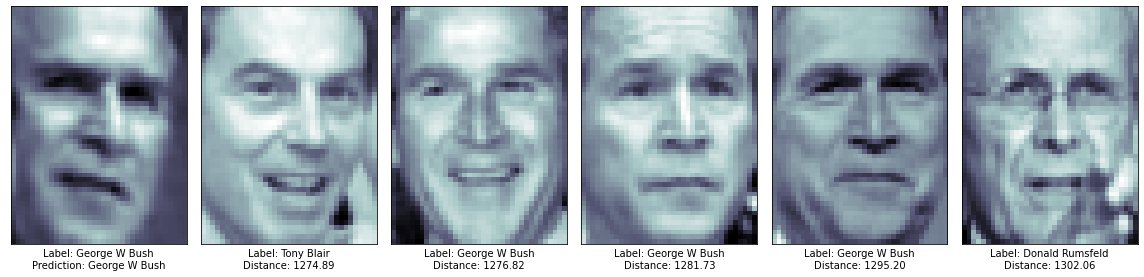

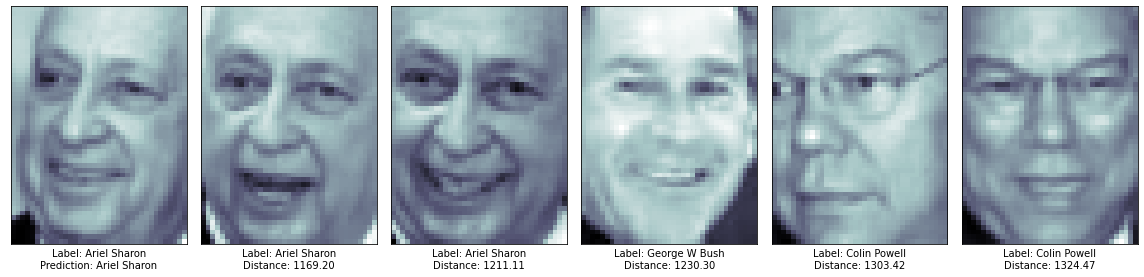

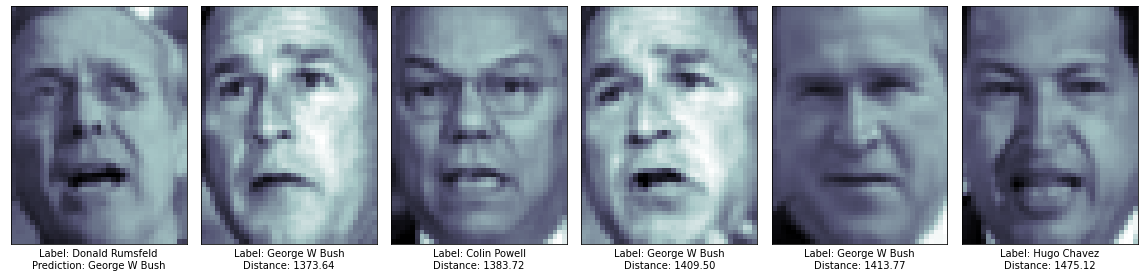

In [25]:
knn_query(X_train, X_test, X_train_image, X_test_image, y_train, y_test, name, n_neighbors=5, n_queries=5)

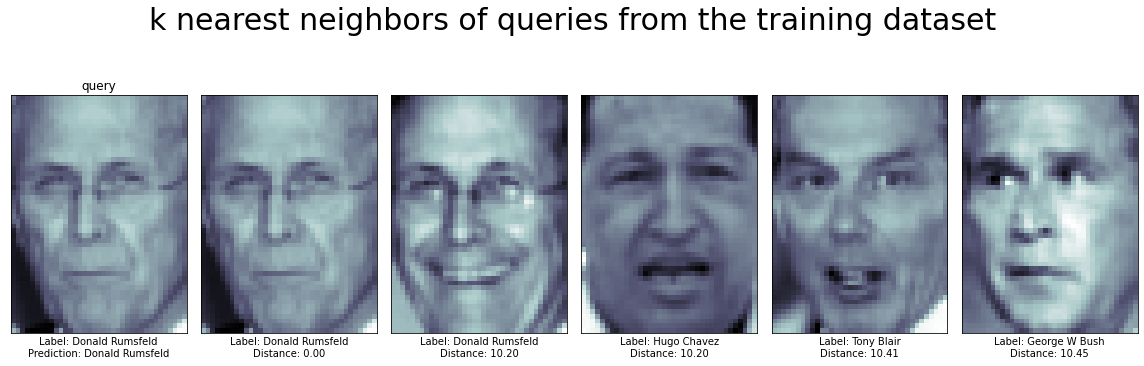

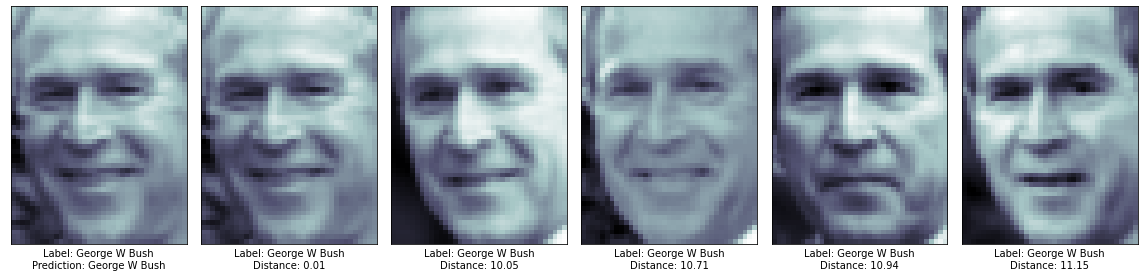

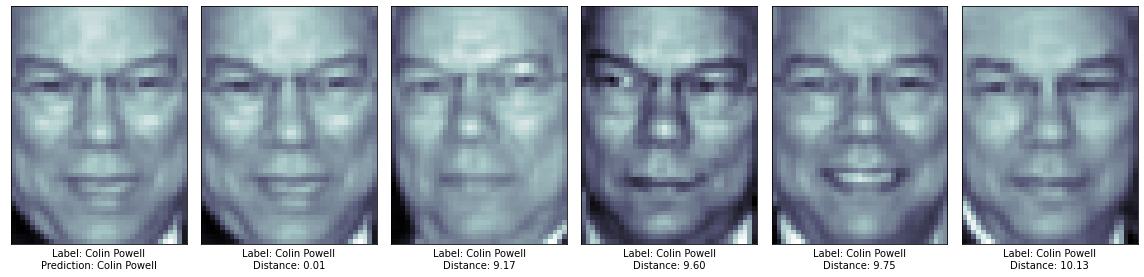

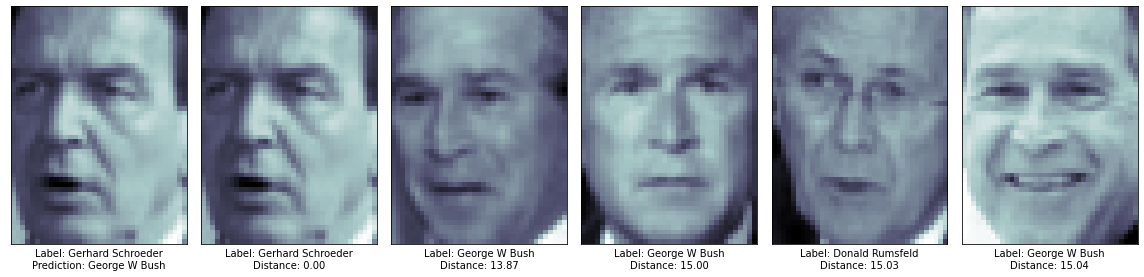

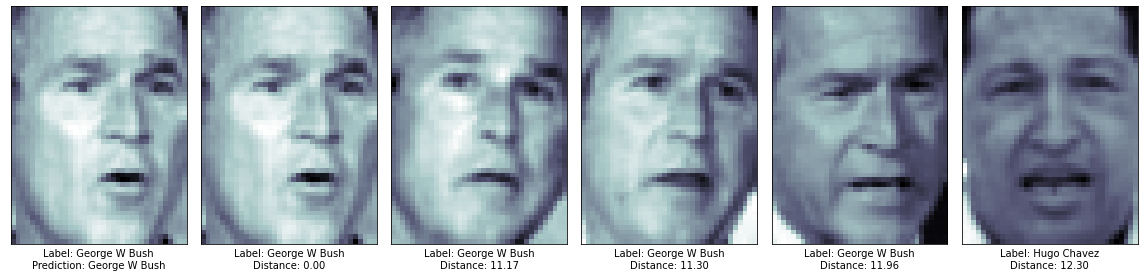

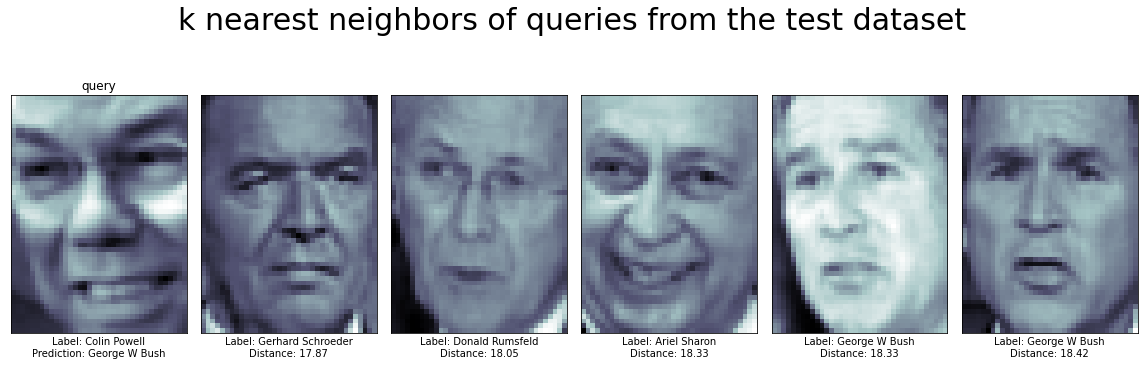

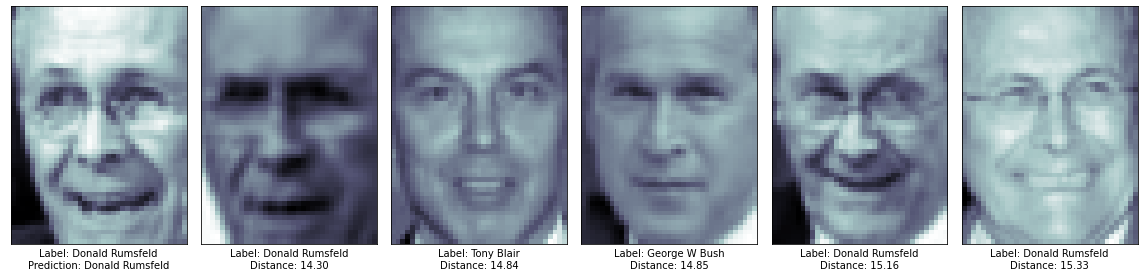

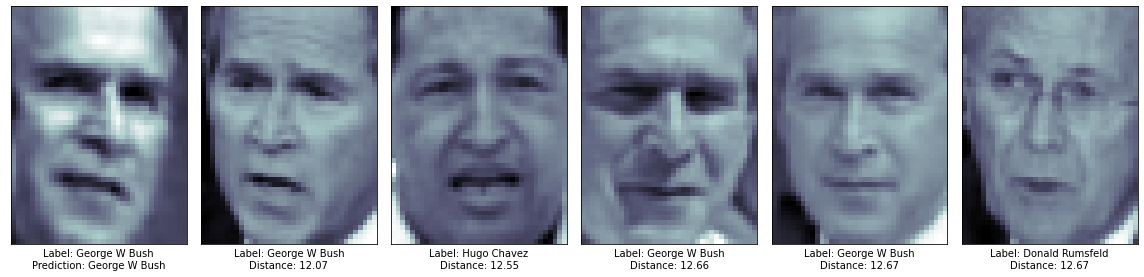

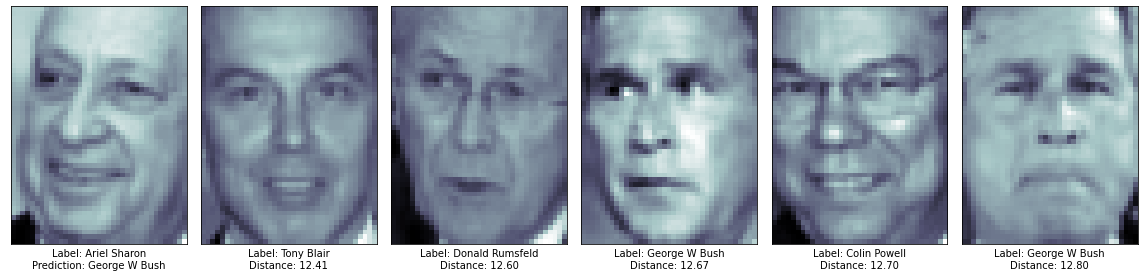

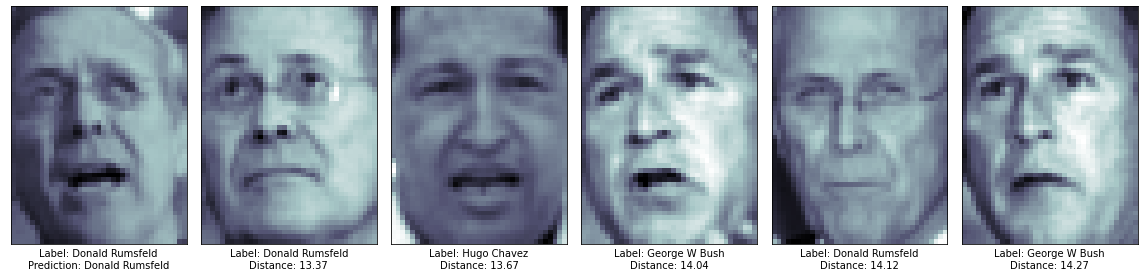

In [26]:
knn_query(X_train_pca, X_test_pca, X_train_image, X_test_image, y_train, y_test, name, n_neighbors=5, n_queries=5)

## Analysis and discussion (20 points)

Your answer must include.....

- Explanation of your implementation of a K-NN classifier method
- Comparison of results for kernel functions
- The optimal choice of *k*
- Model-based learning vs Instance-based learning
- Analysis of the results from P1
    
For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).

---